In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
!kaggle competitions download -c cifar-10

 93% 663M/715M [00:03<00:01, 51.8MB/s]
100% 715M/715M [00:03<00:00, 193MB/s] 


In [3]:
from  zipfile import ZipFile
dataset = '/content/cifar-10.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('done')

done


In [4]:
!ls

cifar-10.zip  sample_data	    test.7z   trainLabels.csv
kaggle.json   sampleSubmission.csv  train.7z


In [6]:
!pip install py7zr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.7/69.7 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.0/97.0 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.7/51.7 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.7/142.7 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.6/413.6 kB 30.0 MB/s eta 0:00:00


In [7]:
import py7zr
archive = py7zr.SevenZipFile('/content/train.7z', mode='r')
archive.extractall()

In [8]:
!ls

cifar-10.zip  sample_data	    test.7z  train.7z
kaggle.json   sampleSubmission.csv  train    trainLabels.csv


importing the libries


In [13]:
import os
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from sklearn.model_selection import train_test_split

In [14]:
filename = os.listdir('/content/train')

In [15]:
len(filename)

50000

In [16]:
print(filename[0:5])
print(filename[-5:])

['10854.png', '15185.png', '16915.png', '19758.png', '26507.png']
['23960.png', '29972.png', '25387.png', '20507.png', '30077.png']


Labels Processing

In [17]:
labels_df = pd.read_csv('/content/trainLabels.csv')

In [18]:
labels_df.shape

(50000, 2)

In [19]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [20]:
labels_df[labels_df["id"]== 10854]

,id,label
10853,10854,truck


In [23]:
labels_df['label'].value_counts()

,count
label,
frog,5000
truck,5000
deer,5000
automobile,5000
bird,5000
horse,5000
ship,5000
cat,5000
dog,5000


In [25]:
labels_dictinory = {'frog':0,'truck':1,'automobile':2,'bird':3,'ship':4,'deer':5,'cat':6,'dog':7,'airplane':8,'horse':9}

In [26]:
labels = [labels_dictinory[i] for i in labels_df['label']]

In [27]:
labels[0:5]

[0, 1, 1, 5, 2]

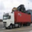

In [34]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/train/10854.png')
cv2_imshow(img)

In [35]:
train_data_folder = '/content/train/'

data =[]

for i in labels_df['id']:
  img = Image.open(train_data_folder+str(i)+'.png')
  img = np.array(img)
  data.append(img)

In [36]:
len(data)

50000

In [39]:
data[0].shape

(32, 32, 3)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
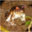

In [40]:
data[0]

In [42]:
X = np.array(data)
y = np.array(labels)

In [43]:
print(X.shape)
print(y.shape)

(50000, 32, 32, 3)
(50000,)


Train Test Split

In [45]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [46]:
#scaling the data
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [57]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from tensorflow.keras import models, layers
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout,UpSampling2D
from tensorflow.keras.models import Model
from keras.models import load_model
from keras.applications.resnet50 import ResNet50
from keras import optimizers

In [52]:
convulution_base = ResNet50(weights='imagenet',include_top=False,input_shape=(256,256,3))
convulution_base.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 262, 262,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 128, 128,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 128, 128,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 128, 128,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 130, 130,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 64, 64,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 64, 64,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 64, 64,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 64, 64,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 64, 64,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 64, 64,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 64, 64,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 64, 64,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 64, 64,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [61]:
model = models.Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(convulution_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(10,activation='softmax'))

In [63]:
model.compile(optimizer =optimizers.RMSprop(learning_rate=2e-5),loss='sparse_categorical_crossentropy',metrics=['acc'])

In [64]:
History = model.fit(X_train_scaled,y_train,epochs=10,validation_split=0.1)

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 440s 341ms/step - acc: 0.3299 - loss: 2.0228 - val_acc: 0.7623 - val_loss: 0.9033
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 378s 336ms/step - acc: 0.6774 - loss: 1.0459 - val_acc: 0.8913 - val_loss: 0.4802
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 378s 336ms/step - acc: 0.8027 - loss: 0.7489 - val_acc: 0.9187 - val_loss: 0.3579
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 378s 336ms/step - acc: 0.8679 - loss: 0.5751 - val_acc: 0.9220 - val_loss: 0.3155
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 378s 336ms/step - acc: 0.9089 - loss: 0.4462 - val_acc: 0.9345 - val_loss: 0.2671
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 378s 336ms/step - acc: 0.9361 - loss: 0.3517 - val_acc: 0.9325 - val_loss: 0.2489
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 378s 336ms/step - acc: 0.9542 - loss: 0.2834 - val_acc: 0.9365 - val_loss: 0.2320
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 378s 336ms/step - acc: 0.9631 - loss: 0.2312 - val_acc: 0.9383 - val_loss: 0.2275
Epoch 9/

In [68]:
loss,acc= model.evaluate(X_test_scaled,y_test)
acc

313/313 ━━━━━━━━━━━━━━━━━━━━ 37s 106ms/step - acc: 0.9450 - loss: 0.2143


0.9412999749183655

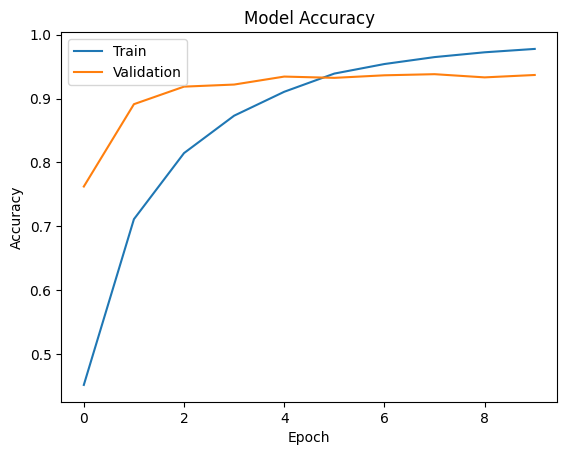

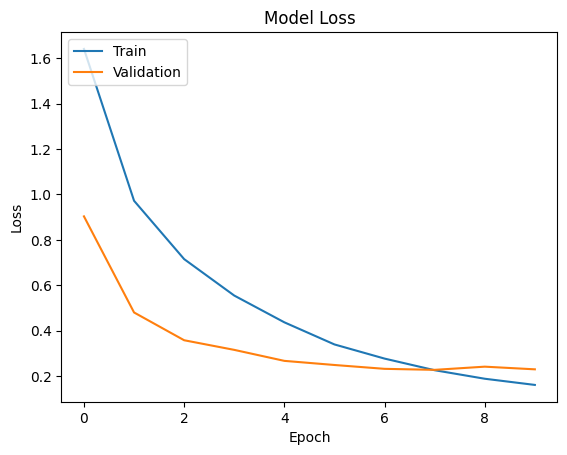

In [69]:
plt.plot(History.history['acc'])
plt.plot(History.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


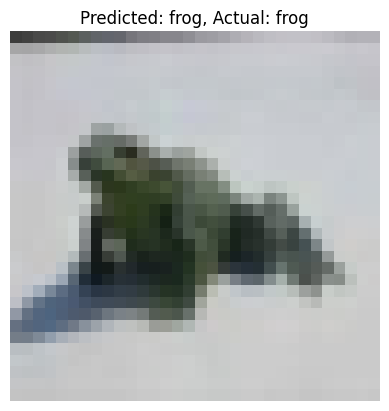

Predicted Label: frog
Actual Label: frog


In [72]:
import random

# Select a random index from the test set
random_index = random.randint(0, len(X_test_scaled) - 1)

# Get the image and its actual label
random_image = X_test_scaled[random_index]
actual_label = y_test[random_index]

# Reshape the image to match the model input shape (add batch dimension)
image_for_prediction = np.expand_dims(random_image, axis=0)

# Make the prediction
predictions = model.predict(image_for_prediction)

# Get the predicted label index
predicted_label_index = np.argmax(predictions)

# Convert the predicted label index back to the original label string
reverse_labels_dictinory = {v: k for k, v in labels_dictinory.items()}
predicted_label = reverse_labels_dictinory[predicted_label_index]
actual_label_str = reverse_labels_dictinory[actual_label]

# Display the image and results
plt.imshow(random_image)
plt.title(f"Predicted: {predicted_label}, Actual: {actual_label_str}")
plt.axis('off')
plt.show()

print(f"Predicted Label: {predicted_label}")
print(f"Actual Label: {actual_label_str}")